In [2]:
!pip install --upgrade pip
!pip install -r requirements.txt
!pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:
      Successfully uninstalled pip-22.3
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
Obtaining taming-transformers from git+https://github.com/CompVis/taming-transformers.git@master#egg=taming-transformers (from -r requirements.txt (line 23))
  Cloning https://github.com/CompVis/taming-transformers.git (to revision master) to ./src/taming-transformers
  Running command git clone --filter=blob:none --quiet https://github.com/CompVis/taming-transformers.git /home/ubuntu/stable-diffusion/src/taming-transformers
  Resolved https://github.com/CompVis/taming-transformers.git to commit 3ba01b241669f5ade541ce990f7650a3b8f65318
  

Resolving data files:   0%|          | 0/96 [00:00<?, ?it/s]

Using custom data configuration default-9d865fde5f61ba62
Reusing dataset imagefolder (/home/ubuntu/.cache/huggingface/datasets/imagefolder/default-9d865fde5f61ba62/0.0.0/0fc50c79b681877cc46b23245a6ef5333d036f48db40d53765a68034bc48faff)


{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=256x256 at 0x7FC705F22490>, 'text': "a boy grabbing a woman's bag"}
a boy grabbing a woman's bag


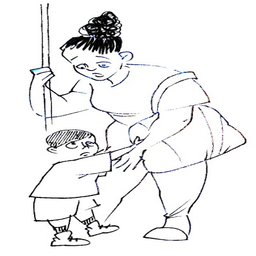

In [25]:
from datasets import load_dataset
# ds = load_dataset("lambdalabs/pokemon-blip-captions", split="train")

ds = load_dataset("imagefolder", data_dir="/home/ubuntu/people-training-resized", split="train")
sample = ds[0]
print(sample["text"])
display(sample["image"])

In [41]:
# Resize dataset to 256, 256
from PIL import Image
import os, sys
import cv2
import numpy as np

def resize():
    path = "/home/ubuntu/people-training/"
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(path+item) and (item.endswith(".png") or item.endswith(".jpg")):
            im = Image.open(path + item)
            f, e = os.path.splitext(path + item)
            image = im.resize((256, 256), Image.ANTIALIAS)
            image = np.array(image)
            image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
            image = Image.fromarray(np.uint8(image)).convert('RGB')
            image.save(f.replace('people-training', 'people-training-resized') + '.png', 'PNG')


def check_image_channels():
    path = "/home/ubuntu/people-training-resized/"
    dirs = os.listdir(path)
    for file in dirs:
        if os.path.isfile(path + file) and (file.endswith(".png") or file.endswith(".jpg")):
            image = Image.open(path + file)
            image = np.array(image)
            print(image.shape)
            
            
check_image_channels()

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [21]:
import torch

model_path = '/home/ubuntu/models/sd-v1-4-full-ema.ckpt'

ckpt = torch.load(model_path)

In [ ]:
!(python main.py \
    -t \
    --base configs/stable-diffusion/art.yaml \
    --scale_lr False \
    --gpus 1 \
    --num_nodes 1 \
    --check_val_every_n_epoch 20 \
    --finetune_from "$model_path" \
    --seed 47 \
    data.params.batch_size=4 \
    lightning.trainer.accumulate_grad_batches=2 \
    data.params.validation.params.n_gpus=1 \
 )

Global seed set to 47
Running on GPUs 1
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.17.self_attn.q_proj.weight', 'vision_model.encoder.layers.11.mlp.fc2.weight', 'vision_model.encoder.layers.8.self_attn.k_proj.bias', 'vision_model.encoder.layers.18.self_attn.out_proj.weight', 'vision_model.encoder.layers.11.mlp.fc1.weight', 'vision_model.encoder.layers.20.self_attn.q_proj.bias', 'vision_model.encoder.layers.9.mlp.fc1.bias', 'vision_model.encoder.layers.12.layer_norm1.weight', 'vision_model.encoder.layers.22.self_attn.out_proj.weight', 'vision_model.encoder.layers.19.self_attn.k_proj.weight', 'vision_model.encoder

In [12]:
# Inference with the base model working fine
ckpt_path = 'logs/2022-11-07T04-57-36_pokemon/checkpoints/last.ckpt'

!(python scripts/txt2img.py \
    --prompt 'robotic cat with wings' \
    --outdir 'outputs/generated_pokemon' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/pokemon.yaml' \
    --ckpt "$ckpt_path")

Global seed set to 42
Loading model from logs/2022-11-07T04-57-36_pokemon/checkpoints/last.ckpt
Global Step: 2000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.5.self_attn.q_proj.weight', 'vision_model.encoder.layers.18.self_attn.q_proj.bias', 'vision_model.encoder.layers.22.self_attn.v_proj.weight', 'vision_model.encoder.layers.19.mlp.fc1.bias', 'vision_model.encoder.layers.23.mlp.fc2.weight', 'vision_model.encoder.layers.11.self_attn.k_proj.weight', 'vision_model.encoder.layers.9.self_attn.k_proj.bias', 'vision_model.encoder.layers.19.self_attn.q_proj.weight', 'vision_model.encoder.layers.0.mlp.fc2.weight', 'visi

In [13]:
!(python scripts/txt2img.py \
    --prompt 'robotic cat with wings' \
    --outdir 'outputs/generated_pokemon' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/pokemon.yaml' \
    --ckpt "$model_path")

Global seed set to 42
Loading model from /home/ubuntu/models/sd-v1-4-full-ema.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.22.mlp.fc2.bias', 'vision_model.encoder.layers.22.self_attn.out_proj.bias', 'vision_model.encoder.layers.4.layer_norm2.weight', 'vision_model.encoder.layers.5.self_attn.out_proj.weight', 'vision_model.encoder.layers.16.self_attn.v_proj.weight', 'vision_model.encoder.layers.21.self_attn.k_proj.weight', 'vision_model.encoder.layers.15.mlp.fc2.weight', 'vision_model.encoder.layers.3.layer_norm1.weight', 'vision_model.encoder.layers.0.self_attn.k_proj.weight', 'vision_mode